In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
missing_val = train.isna().sum()
print(missing_val[missing_val> 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<Axes: xlabel='SalePrice', ylabel='Count'>

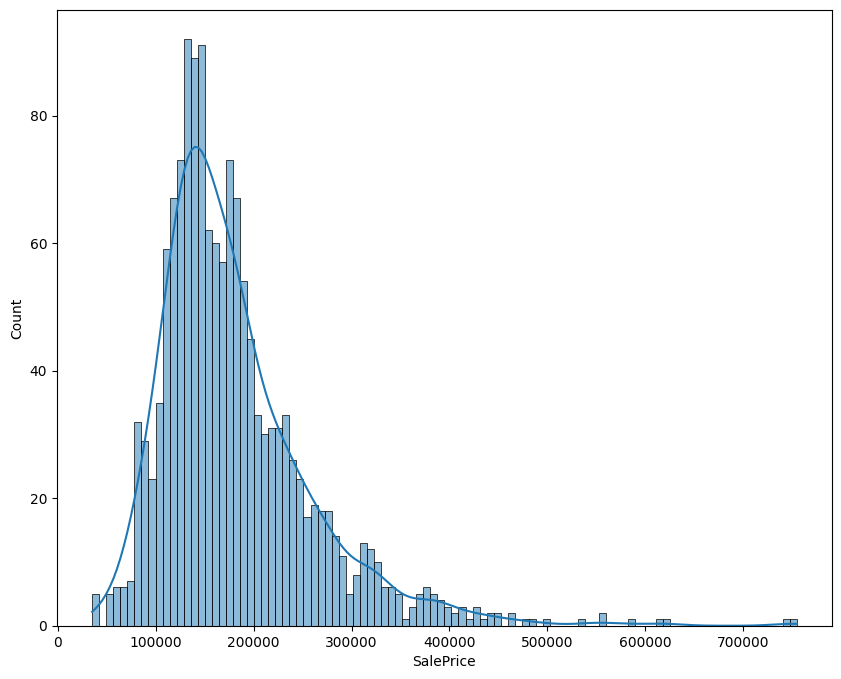

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(train['SalePrice'], bins = 100, kde = True)

In [9]:
train.drop(columns = ["Id"], inplace = True)

In [10]:
train_del_mis = train.copy()

mis_50 = len(train_del_mis) * 0.5
train_del_mis = train_del_mis.dropna(axis = 1, thresh = mis_50)
train_del_mis = train_del_mis.dropna(axis = 0,subset=['FireplaceQu'])

train_del_mis = train_del_mis.dropna(axis = 0, subset = ['Electrical'])

In [11]:
train_del_mis.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000


In [12]:
num = train_del_mis.select_dtypes(include = 'number')
cat = train_del_mis.select_dtypes(include = 'object')

num_mis = num.isna().sum()
cat_mis = cat.isna().sum()

print(f"Number_missing: {num_mis[num_mis > 0]}")
print(f"Object_missing: {cat_mis[cat_mis > 0]}")


Number_missing: LotFrontage    169
MasVnrArea       4
GarageYrBlt      9
dtype: int64
Object_missing: BsmtQual         9
BsmtCond         9
BsmtExposure    10
BsmtFinType1     9
BsmtFinType2    10
GarageType       9
GarageFinish     9
GarageQual       9
GarageCond       9
dtype: int64


In [13]:
train_del_mis['LotFrontage'] = train_del_mis['LotFrontage'].fillna(train_del_mis['LotFrontage'].median())
train_del_mis['MasVnrArea'] = train_del_mis['MasVnrArea'].fillna(train_del_mis['MasVnrArea'].median())
train_del_mis['GarageYrBlt'] = train_del_mis['GarageYrBlt'].fillna(train_del_mis['GarageYrBlt'].median())

In [14]:
cat_cols = train_del_mis.select_dtypes(include='object').columns
train_del_mis[cat_cols] = train_del_mis[cat_cols].fillna(train_del_mis[cat_cols].mode().iloc[0])

In [15]:
y = train_del_mis['SalePrice']
train_del_mis.drop(columns = 'SalePrice', inplace = True)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_del_mis, y, test_size = 0.2, random_state = 42)

In [17]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()

cat_cols = X_train.select_dtypes(include='object').columns

X_train[cat_cols] = target_encoder.fit_transform(X_train[cat_cols], y_train)
X_valid[cat_cols] = target_encoder.transform(X_valid[cat_cols], y_valid)

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200,300, 500, 900],
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.01, 0.05, 0.03],
    "subsample":[0.5, 0.9, 1.0]
}

xgb_model = XGBRegressor(
    random_state = 42,
)

grid_search = GridSearchCV(
    estimator = xgb_model,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)
rmse = np.sqrt(-grid_search.best_score_)

print("Лучшие параметры:", grid_search.best_params_)
print("RMSE:", rmse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 900, 'subsample': 1.0}
RMSE: 36648.25553298609


In [19]:
import optuna
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import warnings
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

def obj(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators",100, 5000),  # Количество деревьев
              "max_depth": trial.suggest_int("max_depth", 3, 10),         # Максимальная глубина деревьев
              "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.4, log=True),  # Скорость обучения
              "subsample": trial.suggest_float("subsample", 0.5, 1.0),    # Доля выборки для обучения
              "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # Доля признаков для каждого дерева
              "gamma": trial.suggest_float("gamma", 0, 10),               # Минимальное снижение потерь для разделения
              "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 100, log=True),  # L1-регуляризация
              "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 100, log=True),  # L2-регуляризация
              "random_state": 42,
              "objective": "reg:squarederror", 
              "eval_metric": "rmse"   
    }

    model = XGBRegressor(**params)
    model.fit(
        X_train, y_train, 
        eval_set = [(X_valid, y_valid)],
        early_stopping_rounds = 50,
        verbose = False
    )

    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    return rmse

study = optuna.create_study(direction = 'minimize')
study.optimize(obj, n_trials = 1000)

print("Лучшие параметры:", study.best_params)
print("Лучшая метрика (rmse):", study.best_value) 

Лучшие параметры: {'n_estimators': 728, 'max_depth': 4, 'learning_rate': 0.011161646764852621, 'subsample': 0.6606465457273044, 'colsample_bytree': 0.9698206978938012, 'gamma': 1.2498450717370035, 'reg_alpha': 1.969895979606347, 'reg_lambda': 2.9729171330487642e-05}
Лучшая метрика (rmse): 27448.350523344558


In [20]:
mis_50 = len(train_del_mis) * 0.5
test = test.dropna(axis = 1, thresh = mis_50)
test = test.drop(['MasVnrType'], axis = 1)
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode().iloc[0])

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

cat_cols = test.select_dtypes(include='object').columns
test[cat_cols] = test[cat_cols].fillna(test[cat_cols].mode().iloc[0])

test[cat_cols] = target_encoder.transform(test[cat_cols])

In [21]:
best_model = XGBRegressor(**study.best_params, random_state = 42)
best_model.fit(X_train, y_train)

y_pred_val = best_model.predict(X_valid)
rmse_val = np.sqrt(mean_squared_error(y_valid, y_pred_val))
print(f"Лучшая метрика (rmse): {rmse_val}")

Лучшая метрика (rmse): 27455.126271913283
